### Ligger, 1 q-last:

In [1]:
[g_g, g_q] = [1.2, 1.5]
[g_k, q_k] = [5.5, 2.95]

l_ov = 7.8
b = 1 # [m]

c_M = 1/8       # M = factor * q * L^2
c_umax = 1/250   # u_max = c_umax * L
c_u = 5/384      # I_min = c_u * (q * L^4) / (EI * u_max)

#fy = 355
E = 37000

In [2]:
q_E = (g_k + q_k) * b
q_Ed = (g_g * g_k + g_q * q_k) * b
q_E, q_Ed

M_Ed = c_M * q_Ed * l_ov**2
V_Ed = 1/2 * q_Ed * l_ov
round(M_Ed,1), round(V_Ed,1)

(83.8, 43.0)

In [43]:
W_min = M_Ed * 10**6 / fy
round(W_min,0)

1705986.0

In [3]:
u_max = c_umax * (l_ov * 1e3)
I_min = c_u * (q_E * (l_ov * 1e3)**4) / (E * u_max)
round(u_max,1), round(I_min,0)

(31.2, 352791068.0)

Uitvoer:

In [4]:
from IPython.display import Markdown as md

outp = """
$\\begin{align*}
&g_{k} & &= \ %.2f \ kN/m^{2} & \gamma_{g} &= %.2f \\\\
&q_{k} & &= \ %.2f \ kN/m^{2} & \gamma_{q} &= %.2f \\\\
&q_{E} & &= b \cdot (g_{k} + q_{k}) & & = %.1f \ kN/m^{1} \\\\
&q_{Ed} & &= b \cdot (g_{g} \cdot g_{k} + g_{q} \cdot q_{k}) & &= %.1f \ kN/m^{1} \\\\
\\\\
&l_{ov} & &= %.2f m \\\\
&M_{Ed} & &= 1/%i \cdot q_{Ed} \cdot l_{ov}^{2} & &= %.1f \ kNm \\\\
&V_{Ed} & &= 1/2 \cdot q_{Ed} \cdot l_{ov} & &= %.1f \ kN \\\\
&f_{yd} & &= %i \ MPa \\\\
&W_{min} & &= M_{Ed} \ / \ f_{yd} & &= %.1f x10^3 mm^3 \\\\
\\\\
&u_{max} & & = 1/%i \cdot l_{ov} & &= %.1f \ mm \\\\
&I_{min} & & = %.3f \cdot (q_E \cdot l_{ov}^4) \ / \ (E \cdot u_{max}) & &= %.1f x10^4 mm^4
\\end{align*}$
"""%(g_k, g_g, q_k, g_q, q_E, q_Ed, l_ov, 1/c_M, M_Ed, V_Ed, fy, W_min/10**3, 1/c_umax, u_max, c_u, I_min/10**4)

md(outp)

NameError: name 'fy' is not defined

### Ligger, 1 q-last (incl. grafische weergave):

In [5]:
%run "!ALG_funcs.ipynb"

In [9]:
I = 1195 * 10**6 # [mm4]

n = 10
x = [0, 0.5 * l_ov, l_ov]
x = add_steps(n, x)

Mq = Mq_2stp(-q_Ed, l_ov, x)
uq = uq_2stp(-q_E, l_ov * 1e3, x * 1e3, E, I)
ubij = uq_2stp(-q_k, l_ov * 1e3, x * 1e3, E, I)

u_max = round(min(uq),1)
u_bmax = round(min(ubij),1)
M_max = round(min(Mq),0)
xu_max = round(x[np.argmin(uq)],2)
xM_max = round(x[np.argmin(Mq)],2)
#xu_max, xM_max

In [7]:
import matplotlib.pyplot as plt

plotsize = (20/2.54,10/2.54) #afmeting in inches
plot_dpi = 150
font = {'weight' : 'normal',
        'size'   : 6}

plt.rc('font', **font)

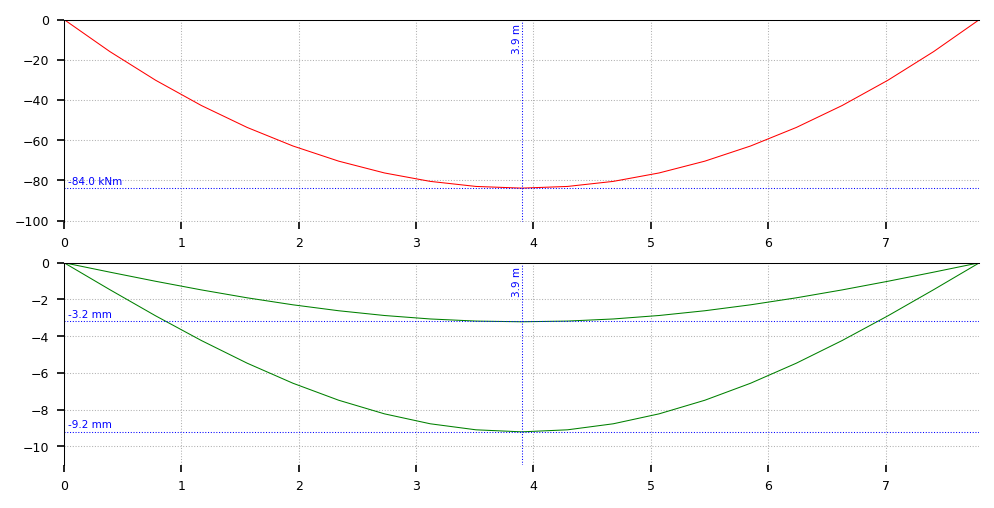

In [10]:
fig, ax = plt.subplots(2, 1, figsize=plotsize, dpi=plot_dpi)

ax[0].plot(x, Mq, color='r', linewidth=0.5, label='VX')

ax[0].set_ylim(M_max*1.2, 0)
ax[0].axhline(y=M_max, linestyle = ':', color="b", linewidth=0.5)
ax[0].axvline(x=xM_max, linestyle = ':', color="b", linewidth=0.5)
ax[0].annotate(xy=[0, M_max], textcoords="offset points", xytext=(2,2), fontsize=5, color='b', s=str(M_max) + ' kNm')
ax[0].annotate(xy=[xM_max, 0], textcoords="offset points", xytext=(0,-2), va = 'top', ha='right', fontsize=5, rotation=90, color='b', s=str(xM_max) + ' m')

ax[1].plot(x, uq, color='g', linewidth=0.5, label='VY')
ax[1].plot(x, ubij, color='g', linewidth=0.5, label='VY')

ax[1].set_ylim(u_max*1.2, 0)
ax[1].axhline(y=u_max, linestyle = ':', color="b", linewidth=0.5)
ax[1].axhline(y=u_bmax, linestyle = ':', color="b", linewidth=0.5)
ax[1].axvline(x=xu_max, linestyle = ':', color="b", linewidth=0.5)
ax[1].annotate(xy=[0, u_max], textcoords="offset points", xytext=(2,2), fontsize=5, color='b', s=str(u_max) + ' mm')
ax[1].annotate(xy=[0, u_bmax], textcoords="offset points", xytext=(2,2), fontsize=5, color='b', s=str(u_bmax) + ' mm')
ax[1].annotate(xy=[xu_max, 0], textcoords="offset points", xytext=(0,-2), va = 'top', ha='right', fontsize=5, rotation=90, color='b', s=str(xu_max) + ' m')

for i in range(len(ax)):
    ax[i].grid(True, which='both', linewidth=0.5, linestyle='dotted')
    ax[i].set_xlim(0, max(x))
    for j in ['left','bottom']:
        ax[i].spines[j].set_color('none')
    for j in ['top', 'right']:
        ax[i].spines[j].set_linewidth(0.5)
        ax[i].spines[j].set_position('zero')

plt.show()

### Ligger, 1 puntlast & 1 q-last (incl. grafische weergave):

In [15]:
[g_g, g_q] = [1.2, 1.5]
[g_k, q_k] = [21.3, 4]
[G_k, Q_k] = [95, 18]

q_E = (g_k + q_k)
q_Ed = (g_g * g_k + g_q * q_k)

F_E = G_k + Q_k
F_Ed = g_g * G_k + g_q * Q_k
q_E, q_Ed, F_E, F_Ed

(25.3, 31.56, 113, 141.0)

In [47]:
a = 1.0 # [m]
l_ov = 7.0 # [m]
I_y = 22930 * 10**4 # [mm4]

n = 10
x = [0, a, 0.5 * l_ov, l_ov]
x = add_steps(n, x)

Mq = Mq_2stp(-q_Ed, l_ov, x)
uq = uq_2stp(-q_E, l_ov * 1e3, x * 1e3, E, I_y)

MF = MF_2stp(-F_Ed, l_ov, a, x)
uF = uF_2stp(-F_E * 1e3, l_ov * 1e3, a * 1e3, x * 1e3, E, I_y)

Mtot = Mq + MF
utot = uq + uF

#round(min(Mtot),1), round(min(utot),1)

u_max = round(min(utot),1)
M_max = round(min(Mtot),0)
xu_max = round(x[np.argmin(utot)],2)
xM_max = round(x[np.argmin(Mtot)],2)
#xu_max, xM_max

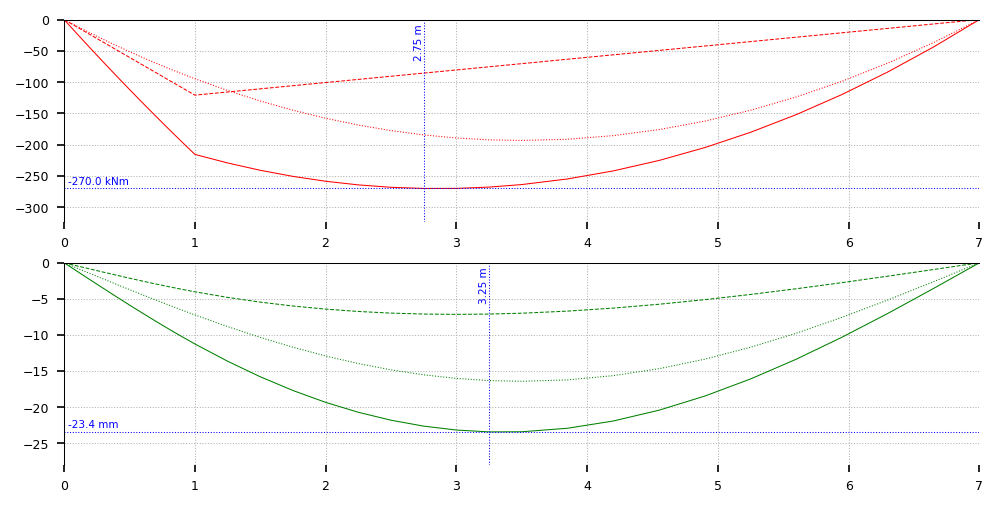

In [48]:
fig, ax = plt.subplots(2, 1, figsize=plotsize, dpi=plot_dpi)

ax[0].plot(x, Mq, color='r', linestyle='dotted', linewidth=0.5, label='VX')
ax[0].plot(x, MF, color='r', linestyle='dashed', linewidth=0.5, label='VX')
ax[0].plot(x, Mtot, color='r', linewidth=0.5, label='VX')

ax[0].set_ylim(M_max*1.2, 0)
ax[0].axhline(y=M_max, linestyle = ':', color="b", linewidth=0.5)
ax[0].axvline(x=xM_max, linestyle = ':', color="b", linewidth=0.5)
ax[0].annotate(xy=[0, M_max], textcoords="offset points", xytext=(2,2), fontsize=5, color='b', s=str(M_max) + ' kNm')
ax[0].annotate(xy=[xM_max, 0], textcoords="offset points", xytext=(0,-2), va = 'top', ha='right', fontsize=5, rotation=90, color='b', s=str(xM_max) + ' m')

ax[1].plot(x, uq, color='g', linestyle='dotted', linewidth=0.5, label='VY')
ax[1].plot(x, uF, color='g', linestyle='dashed', linewidth=0.5, label='VY')
ax[1].plot(x, utot, color='g', linewidth=0.5, label='VY')

ax[1].set_ylim(u_max*1.2, 0)
ax[1].axhline(y=u_max, linestyle = ':', color="b", linewidth=0.5)
ax[1].axvline(x=xu_max, linestyle = ':', color="b", linewidth=0.5)
ax[1].annotate(xy=[0, u_max], textcoords="offset points", xytext=(2,2), fontsize=5, color='b', s=str(u_max) + ' mm')
ax[1].annotate(xy=[xu_max, 0], textcoords="offset points", xytext=(0,-2), va = 'top', ha='right', fontsize=5, rotation=90, color='b', s=str(xu_max) + ' m')


for i in range(len(ax)):
    ax[i].grid(True, which='both', linewidth=0.5, linestyle='dotted')
    ax[i].set_xlim(0, max(x))
    for j in ['left','bottom']:
        ax[i].spines[j].set_color('none')
    for j in ['top', 'right']:
        ax[i].spines[j].set_linewidth(0.5)
        ax[i].spines[j].set_position('zero')

plt.show()